In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
tickers = yf.Tickers("TSLA AAPL MSFT GOOGL BAC MVIS NIO YMAB")

tesla = tickers.tickers['TSLA'].history(period="max")
tesla.to_csv('Tesla_Stocks.csv')


#split 20% data for test, 80% for train


tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2021-05-10,664.900024,665.049988,627.609985,629.039978,31392400,0,0.0
2021-05-11,599.239990,627.099976,595.599976,617.200012,46503900,0,0.0
2021-05-12,602.489990,620.409973,586.770020,589.890015,33823600,0,0.0


In [57]:
dataset = tesla['Close'].values
new_dataset = [[i] for i in dataset]
new_dataset

[[4.7779998779296875],
 [4.765999794006348],
 [4.392000198364258],
 [3.8399999141693115],
 [3.2219998836517334],
 [3.1600000858306885],
 [3.492000102996826],
 [3.4800000190734863],
 [3.4100000858306885],
 [3.628000020980835],
 [3.9679999351501465],
 [3.9779999256134033],
 [4.127999782562256],
 [4.381999969482422],
 [4.059999942779541],
 [4.044000148773193],
 [4.199999809265137],
 [4.257999897003174],
 [4.190000057220459],
 [4.110000133514404],
 [4.144000053405762],
 [4.070000171661377],
 [3.98799991607666],
 [4.184000015258789],
 [4.389999866485596],
 [4.251999855041504],
 [4.090000152587891],
 [3.9179999828338623],
 [3.9200000762939453],
 [3.805999994277954],
 [3.5799999237060547],
 [3.5199999809265137],
 [3.6640000343322754],
 [3.75600004196167],
 [3.8299999237060547],
 [3.753999948501587],
 [3.757999897003174],
 [3.819999933242798],
 [4.026000022888184],
 [3.8399999141693115],
 [3.9800000190734863],
 [3.950000047683716],
 [3.940000057220459],
 [3.9739999771118164],
 [3.8959999084472

In [58]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_dataset)
scaled_data    

array([[0.00183878],
       [0.00182514],
       [0.00140011],
       ...,
       [0.66679167],
       [0.6461082 ],
       [0.66662118]])

In [94]:
import numpy as np
x_train, y_train = [], []
for i in range(300,len(train)):
    x_train.append(scaled_data[i-300:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [95]:
%matplotlib inline

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=7, batch_size=1, verbose=2)



Epoch 1/7
1892/1892 - 30s - loss: 2.6493e-05
Epoch 2/7
1892/1892 - 30s - loss: 1.2599e-05
Epoch 3/7
1892/1892 - 30s - loss: 9.4565e-06
Epoch 4/7
1892/1892 - 30s - loss: 7.0130e-06
Epoch 5/7
1892/1892 - 30s - loss: 7.1554e-06
Epoch 6/7
1892/1892 - 31s - loss: 5.8273e-06
Epoch 7/7
1892/1892 - 29s - loss: 5.7706e-06


In [96]:
train = tesla[0:2192]
valid = tesla[2192:]

init_inputs = tesla['Close'][len(tesla) - len(valid) - 300:].values
inputs = [[i] for i in init_inputs]

inputs  = scaler.transform(inputs)

X_test = []
for i in range(300,inputs.shape[0]):
    X_test.append(inputs[i-300:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

<ipython-input-97-b4d7717a288c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Predictions
Date,,,,,,,,
2019-03-15,56.702000,56.743999,54.880001,55.085999,73927500,0,0.0,56.627106
2019-03-18,55.200001,55.610001,53.459999,53.897999,51405000,0,0.0,53.688145
2019-03-19,53.500000,54.660000,52.692001,53.493999,59003000,0,0.0,52.569229
2019-03-20,53.938000,54.993999,53.259998,54.720001,34541000,0,0.0,52.125866
2019-03-21,54.520000,55.290001,53.689999,54.804001,29735500,0,0.0,53.428482
...,...,...,...,...,...,...,...,...
2021-05-10,664.900024,665.049988,627.609985,629.039978,31392400,0,0.0,611.579651
2021-05-11,599.239990,627.099976,595.599976,617.200012,46503900,0,0.0,571.731140
2021-05-12,602.489990,620.409973,586.770020,589.890015,33823600,0,0.0,563.196899


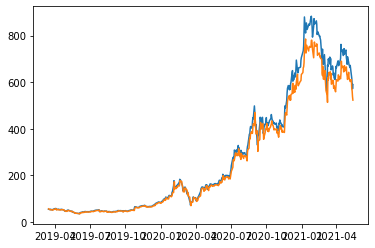

In [97]:

valid['Predictions'] = closing_price

plt.plot(valid[['Close','Predictions']])
valid

# Note

So far, only Tesla stock is being worked on. However, other stocks will follow the same work, thus perfecting a model for one stock is the goal since this model can then be applied to other stocks. 

There are two observations: The higher the epoch number, the more accurate the result. Second, the more days used  to train the model (in my case it was 300 days) the better the results. To improve upon this, I will be trying to incorporate statistics to this model. I have a plan to use news as as source that should affect the results.

# Plan
Incorporate different strategies into the model or the results of the model, specifically the predictions column. One way to make this better is to calculate percent error and try to minimize this percentage. 